##**STEP 1 : PERKENALAN**

**MILESTONES 1**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Computer Vision (Image Classifications)**

**Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :**

* Mampu memahami konsep Computer Vision/NLP.
* Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
* Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
* Mampu menganalisis dan menjelaskan layer yang dibuat.

## **STEP 2 : IMPORTING LIBRARY**

In [1]:
import numpy as np
import PIL
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.pipeline import Pipeline, make_pipeline

# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

%matplotlib inline

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Tensorflow adalah Python library open source untuk komputasi numerik yang dapat mempercepat dan memudahkan dalam menggunakan machine learning.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **STEP 3 : DATA LOADING**

In [3]:
# Set output agar valuenya tetap
np.random.seed(77)
tf.random.set_seed(77)

In [4]:
#Read dataset
train_folder=r'/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/train/'
val_folder=r'/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/valid/'
test_folder=r'/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/test/'

## **STEP 4 : DATA EXPLORATION**

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/class_dict.csv')

In [10]:
data.head(10)

class_index            class  height  width  scale by
0          0.0       air hockey     224    224         1
1          1.0  ampute football     224    224         1
2          2.0          archery     224    224         1
3          3.0    arm wrestling     224    224         1
4          4.0     balance beam     224    224         1
5          5.0    barell racing     224    224         1
6          6.0         baseball     224    224         1
7          7.0       basketball     224    224         1
8          8.0        billiards     224    224         1
9          9.0              bmx     224    224         1

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class_index  73 non-null     float64
 1   class        73 non-null     object 
 2   height       234 non-null    int64  
 3   width        234 non-null    int64  
 4   scale by     234 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.3+ KB


In [12]:
data.shape

(234, 5)

In [14]:
data['class'].unique()

array(['air hockey', 'ampute football', 'archery', 'arm wrestling',
       'balance beam', 'barell racing', 'baseball', 'basketball',
       'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding',
       'canoe slamon', 'cricket', 'croquet', 'curling', 'fencing',
       'field hockey', 'figure skating men', 'figure skating pairs',
       'figure skating women', 'football', 'formula 1 racing', 'frisbee',
       'giant slalom', 'golf', 'hammer throw', 'harness racing',
       'high jump', 'hockey', 'horse jumping', 'horse racing', 'hurdles',
       'ice climbing', 'jai alai', 'javelin', 'judo', 'lacrosse', 'luge',
       'motorcycle racing', 'nascar racing', 'olympic wrestling',
       'parallel bar', 'pole vault', 'polo', 'pommel horse', 'rings',
       'rock climbing', 'rollerblade racing', 'rowing', 'rugby',
       'sailboat racing', 'shot put', 'ski jumping', 'skydiving',
       'snow boarding', 'snowmobile racing', 'speed skating',
       'sumo wrestling', 'surfing', 'swi

In [20]:
data['class'].value_counts()

snowmobile racing       1
archery                 1
field hockey            1
rowing                  1
swimming                1
                       ..
nascar racing           1
skydiving               1
figure skating women    1
sailboat racing         1
hockey                  1
Name: class, Length: 73, dtype: int64

### **About This Dataset**

**Source :** https://www.kaggle.com/gpiosenka/sports-classification

**Content :**
Collection of sports images covering 73 different sports.. Images are 224,224,3 jpg format. Data is separated into train, test and valid directories. Additional a csv file is includes for those that wish to use it to create there own train, test and validation datasets.

**Inspiration :**
Wanted to build a clean data set that was easy to use and had no bad images or duplication between the train, test and validation data sets. Provides a good data set to test your models on. Design for straight forward application of keras preprocessing functions like ImageDataenerator.flowfromdirectory or is you use the csv file ImageDataGenerator.flowfromdataframe

In [6]:
import pathlib
data_dir = pathlib.Path(train_folder)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10416


**Terdapat 10.416 total gambar untuk data training pada folder train_folder.**

In [7]:
datval = pathlib.Path(val_folder)
image_count1 = len(list(datval.glob('*/*.jpg')))
print(image_count1)

365


**Terdapat 365 total gambar untuk data validasi pada folder val_folder.**

In [8]:
dattest = pathlib.Path(test_folder)
image_count2 = len(list(dattest.glob('*/*.jpg')))
print(image_count2)

365


**Terdapat 365 total gambar untuk data test pada folder test_folder.**

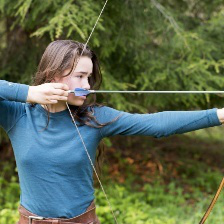

In [ ]:
archery = list(data_dir.glob('archery/*'))
PIL.Image.open(str(archery[0]))

**Melihat gambar ke-0 di folder archery pada data training**

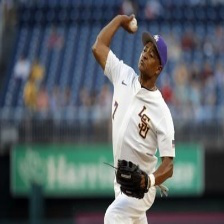

In [ ]:
baseball = list(data_dir.glob('baseball/*'))
PIL.Image.open(str(baseball[0]))

**Melihat gambar ke-0 di folder baseball pada data training**

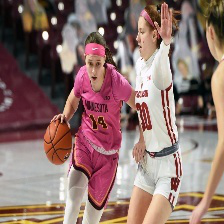

In [ ]:
basketball = list(data_dir.glob('basketball/*'))
PIL.Image.open(str(basketball[0]))

**Melihat gambar ke-0 di folder basketball pada data training**

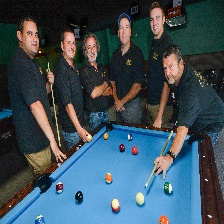

In [ ]:
billiards = list(data_dir.glob('billiards/*'))
PIL.Image.open(str(billiards[0]))

**Melihat gambar ke-0 di folder billiards pada data training**

## **STEP 5 : DATA PREPROCESSING**

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
batch_size = 5

**Disini saya menset-up default ukuran gambar 224 x 224, karena pada context dataset dijelaskan "All images were then resized to 224 X224 X 3 and converted to jpg format."**

In [ ]:
train_dataset = image_dataset_from_directory(
    train_folder,
    shuffle = True,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 10416 files belonging to 73 classes.


In [ ]:
val_dataset = image_dataset_from_directory(
    val_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 365 files belonging to 73 classes.


In [ ]:
test_dataset = image_dataset_from_directory(
    test_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 365 files belonging to 73 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'balance beam', 'barell racing', 'baseball', 'basketball', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'canoe slamon', 'cricket', 'croquet', 'curling', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'football', 'formula 1 racing', 'frisbee', 'giant slalom', 'golf', 'hammer throw', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'hurdles', 'ice climbing', 'jai alai', 'javelin', 'judo', 'lacrosse', 'luge', 'motorcycle racing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'rollerblade racing', 'rowing', 'rugby', 'sailboat racing', 'shot put', 'ski jumping', 'skydiving', 'snow boarding', 'snowmobile racing', 'speed skating', 'sumo wrestling', 'surfing', 'swimming', 'table tennis', 'tennis', 'track bicycle', 'tug of war', 'uneven bars', 'volleyball', 'water pol

### **Using autotune to prevent bottleneck on training**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## **STEP 6 : DEFINE MODEL**

In [ ]:
num_classes = 73

# Base Model
model = Sequential([
    # standardized data
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

### **Train base model**

In [ ]:
epochs=10

history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10
2084/2084 [==============================] - 1122s 291ms/step - loss: 3.6733 - accuracy: 0.1158 - val_loss: 2.8973 - val_accuracy: 0.2466
Epoch 2/10
2084/2084 [==============================] - 32s 15ms/step - loss: 2.3321 - accuracy: 0.3877 - val_loss: 2.5109 - val_accuracy: 0.3288
Epoch 3/10
2084/2084 [==============================] - 32s 15ms/step - loss: 1.0383 - accuracy: 0.7138 - val_loss: 3.3115 - val_accuracy: 0.3397
Epoch 4/10
2084/2084 [==============================] - 31s 15ms/step - loss: 0.3175 - accuracy: 0.9103 - val_loss: 4.4703 - val_accuracy: 0.2712
Epoch 5/10
2084/2084 [==============================] - 32s 15ms/step - loss: 0.1772 - accuracy: 0.9514 - val_loss: 5.9804 - val_accuracy: 0.2877
Epoch 6/10
2084/2084 [==============================] - 31s 15ms/step - loss: 0.1246 - accuracy: 0.9694 - val_loss: 5.9812 - val_accuracy: 0.2959
Epoch 7/10
2084/2084 [==============================] - 32s 15ms/step - loss: 0.1184 - accuracy: 0.9669 - val_loss: 7.694

### **Visualize base model training results**

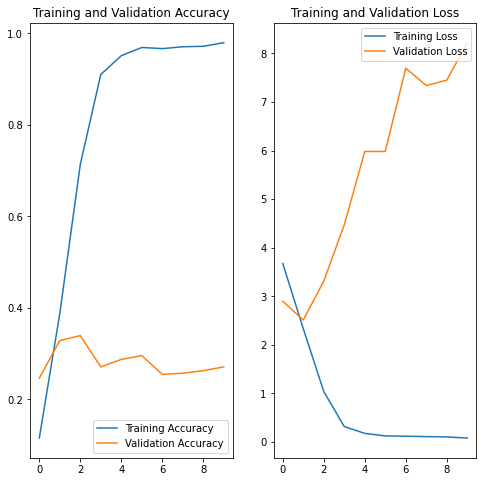

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Dari hasil plot diatas menunjukkan bahwa model overfitting.**

### **Model Improving with Data Augmentation and Dropout**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Dengan data augmentation, jumlah data training dapat ditambah dengan cara menambahkan data tambahan hasil dari "random transformation" sample data training. Kali ini, gambar-gambar yang ada di data training akan di flip, rotasi dan zoom.**

In [ ]:
num_classes = 73

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # This means dropping out 20% of the output units randomly from the applied layer.
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

**Selain menambahkan data augmentation, disini juga ditambahkan dropout untuk mengurangi overfitting.**

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

### **Train model**

In [ ]:
epochs = 20
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/20
2084/2084 [==============================] - 40s 19ms/step - loss: 3.8632 - accuracy: 0.0785 - val_loss: 3.2667 - val_accuracy: 0.2000
Epoch 2/20
2084/2084 [==============================] - 39s 19ms/step - loss: 3.1110 - accuracy: 0.2020 - val_loss: 2.9438 - val_accuracy: 0.2219
Epoch 3/20
2084/2084 [==============================] - 39s 19ms/step - loss: 2.6607 - accuracy: 0.3017 - val_loss: 2.3996 - val_accuracy: 0.3699
Epoch 4/20
2084/2084 [==============================] - 39s 19ms/step - loss: 2.4240 - accuracy: 0.3547 - val_loss: 2.2172 - val_accuracy: 0.4329
Epoch 5/20
2084/2084 [==============================] - 39s 19ms/step - loss: 2.2642 - accuracy: 0.3928 - val_loss: 2.1170 - val_accuracy: 0.4740
Epoch 6/20
2084/2084 [==============================] - 39s 19ms/step - loss: 2.1741 - accuracy: 0.4104 - val_loss: 2.0279 - val_accuracy: 0.4767
Epoch 7/20
2084/2084 [==============================] - 39s 19ms/step - loss: 2.0709 - accuracy: 0.4361 - val_loss: 2.1256 -

### **Visualize training results**

**Membuat plot dari loss dan accuracy pada training dan validation sets.**

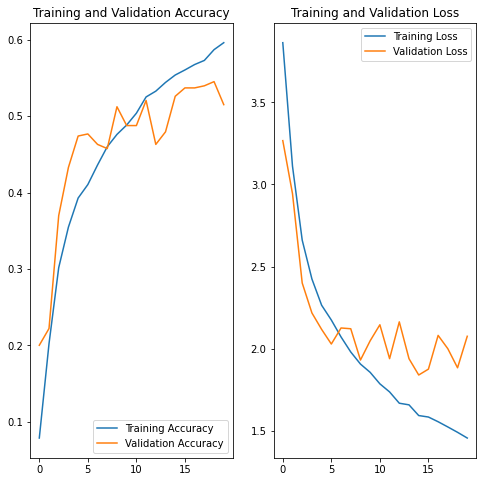

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Setelah diterapkan data augmentation dan dropout, hasil training data tidak overfit lagi. Namun skor Accuracy yang didapat cukup rendah walau sudah di epoch 2x lipat dari sebelumnya.**

### **Model Evaluation**

In [ ]:
model.evaluate(test_dataset)

73/73 [==============================] - 40s 475ms/step - loss: 2.1069 - accuracy: 0.5205


[2.1069302558898926, 0.5205479264259338]

**Akurasi yang didapatkan hanya 52,5%. Claim dari pembuat dataset ini, jika model yang dibuat bagus, maka skor akurasi yang didapat cukup tinggi hingga diatas 90%. Untuk itu, percobaan selanjutnya akan mencoba menggunakan pretrained model MobileNetV2 yang sudah terbukti memiliki struktur yang bagus dan telah di training dengan dataset yang jauh lebih besar dari ini.**

### **Model Inference**

In [ ]:
test_image = r'/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/test/boxing/2.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

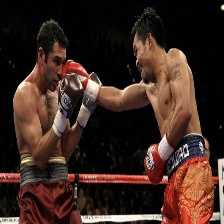

In [ ]:
img

In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to boxing with a 99.65 percent confidence.


**Namun untuk model inference menggunakan dataset baru model mampu memprediksi bahwa gambar tersebut benar merupakan gambar boxing dengan persentase prediksi 99,65% confidence**

### **Model Saving**

In [ ]:
model.save("model_base.h5")

## **STEP 7 : PRE-TRAINED MODEL (MobileNetV2)**

In [ ]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


**Freeze semua layer MobileNet V2. Agar tidak berubah weightnya.**

In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

**Karena layernya dibekukan makan trainable params model ini menjadi nol. Dengan menfreeze layer sebelumnya, selain menghemat banyak waktu untuk training ulang, "hasil belajar" model (dengan datset yang sangat besar)juga tidak ikut hilang jika kita training kembali dengan dataset kita yang tidak seberapa ini.**

### **Create model**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(73)

In [ ]:
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model_MobileNetV2 = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001

model_MobileNetV2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_MobileNetV2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

### **Train model**

In [ ]:
epochs = 20
history = model_MobileNetV2.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/20
2084/2084 [==============================] - 54s 24ms/step - loss: 2.9546 - accuracy: 0.3085 - val_loss: 1.6586 - val_accuracy: 0.6521
Epoch 2/20
2084/2084 [==============================] - 49s 24ms/step - loss: 1.5228 - accuracy: 0.6268 - val_loss: 0.9928 - val_accuracy: 0.8055
Epoch 3/20
2084/2084 [==============================] - 49s 24ms/step - loss: 1.0781 - accuracy: 0.7339 - val_loss: 0.7461 - val_accuracy: 0.8438
Epoch 4/20
2084/2084 [==============================] - 49s 24ms/step - loss: 0.8816 - accuracy: 0.7768 - val_loss: 0.6054 - val_accuracy: 0.8603
Epoch 5/20
2084/2084 [==============================] - 49s 24ms/step - loss: 0.7554 - accuracy: 0.8040 - val_loss: 0.5155 - val_accuracy: 0.8822
Epoch 6/20
2084/2084 [==============================] - 49s 24ms/step - loss: 0.6716 - accuracy: 0.8235 - val_loss: 0.4545 - val_accuracy: 0.8904
Epoch 7/20
2084/2084 [==============================] - 49s 24ms/step - loss: 0.6072 - accuracy: 0.8359 - val_loss: 0.4381 -

### **Visualize training results**

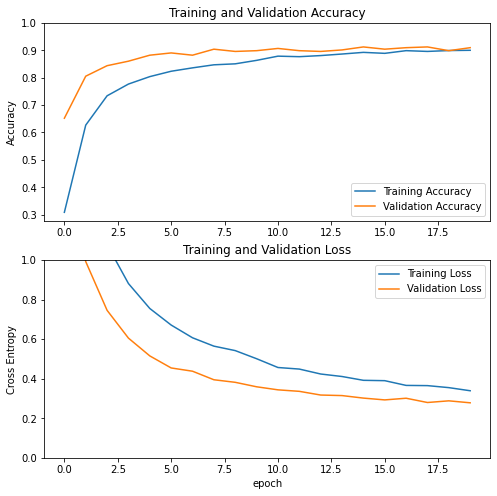

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Dengan pre-trained model MobileNetV2, hasil yang didapatkan jauh lebih baik dari model sebelumnya. Hanya dengan 20 epoch saja, hasil yang didapat sudah sangat baik. Grafik yang dihasilkan pun terlihat bagus antara naiknya akurasi dan turunnya loss dari data training dan data validasi.**

### **Model Evaluation**

In [ ]:
model_MobileNetV2.evaluate(test_dataset)

73/73 [==============================] - 2s 28ms/step - loss: 0.1851 - accuracy: 0.9452


[0.18508020043373108, 0.9452054500579834]

**Akurasi yang didapatkan 94,52%.**

### **Model Inference**

In [ ]:
test_image = r'/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/test/judo/4.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

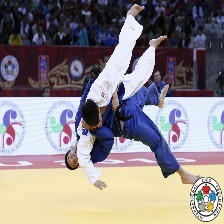

In [ ]:
img

In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_MobileNetV2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to judo with a 99.07 percent confidence.


**Kemudian hasil prediksi model inference pada model ini sangat tepat dengan persentase confidence 99,7%**

### **Model Saving**

In [ ]:
model_MobileNetV2.save("model_base_MobileNetV2.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


### **Fine tuning**

**Adalah proses dimana kita mencoba untuk melatih (train) model lagi dari hasil latihan sebelumnya dengan layer base_model MobileNetV2 sebagian tidak dibekukan (unfreeze).**

#### **Un-freeze the top layers of the model**

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

**Di sini, layer yang akan saya training kembali adalah layer ke-121 sampai akhir. Sementara layer sebelumnya akan tetap difreeze.**

In [ ]:
model_MobileNetV2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

**Optimizer yang digunakan kali ini berbeda dari sebelumnya, yakni RMSprop yang merupakan turunan dari Optimizer. Menurut web resmi tensorflow, Optimizer baiknya digunakan setelah kita mencoba optimizer lain terlebih dahulu sepertim adam, sgd dll. Karena di awal kita sudah memakai optimizer "adam" maka kali ini kita akan mencoba RMSprop.**

In [ ]:
model_MobileNetV2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

**Karena ada sebagian layer yang tidak dibekukan, maka trainable params tidak nol seperti sebelumnya.**

#### **Continue training the model**

In [ ]:
fine_tune_epochs = 10
epochs = 20
total_epochs =  epochs + fine_tune_epochs

history_fine = model_MobileNetV2.fit(train_dataset, epochs=total_epochs,
                                     initial_epoch=history.epoch[-1],
                                     validation_data=val_dataset)

Epoch 20/30
2084/2084 [==============================] - 76s 34ms/step - loss: 0.3384 - accuracy: 0.8933 - val_loss: 0.2729 - val_accuracy: 0.9041
Epoch 21/30
2084/2084 [==============================] - 69s 33ms/step - loss: 0.2907 - accuracy: 0.9072 - val_loss: 0.2300 - val_accuracy: 0.9123
Epoch 22/30
2084/2084 [==============================] - 69s 33ms/step - loss: 0.2618 - accuracy: 0.9174 - val_loss: 0.2354 - val_accuracy: 0.9205
Epoch 23/30
2084/2084 [==============================] - 68s 33ms/step - loss: 0.2447 - accuracy: 0.9204 - val_loss: 0.2016 - val_accuracy: 0.9260
Epoch 24/30
2084/2084 [==============================] - 70s 33ms/step - loss: 0.2291 - accuracy: 0.9278 - val_loss: 0.1590 - val_accuracy: 0.9452
Epoch 25/30
2084/2084 [==============================] - 70s 34ms/step - loss: 0.1968 - accuracy: 0.9363 - val_loss: 0.1760 - val_accuracy: 0.9452
Epoch 26/30
2084/2084 [==============================] - 70s 34ms/step - loss: 0.1812 - accuracy: 0.9432 - val_loss: 0

#### **Visualize the results**

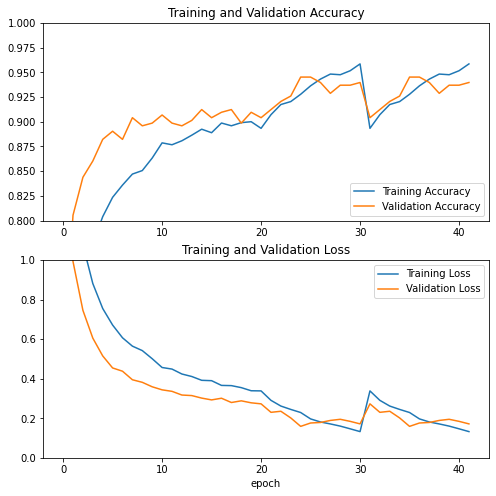

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Hasil percobaan fine tuning dari model sebelumnya dapat terlihat dari plot. Sebelumnya akurasi yang didapatkan model sudah bagus yakni 94,52%. dan setelah di fine tuning naik menjadi 96,44%.**

In [ ]:
loss, accuracy = model_MobileNetV2.evaluate(test_dataset)
print('Test accuracy :', accuracy)

73/73 [==============================] - 2s 27ms/step - loss: 0.0910 - accuracy: 0.9644
Test accuracy : 0.9643835425376892


#### **Model Inference (after fine tuning)**

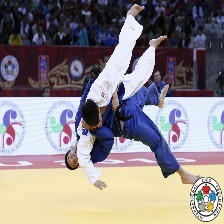

In [ ]:
test_image = r'/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/test/judo/4.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

img

In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_MobileNetV2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to judo with a 100.00 percent confidence.


**Untuk model inferencenya sendiri yang sebelumnya mendapatkan skor prediksi persentase confidence 99,7% ini sudah sangat bagus kemudian setelah dilakukan fine tuning skornya naik jadi 100% ini adalah skor yang sangat sempurna.**

##**STEP 8 : CUSTOM MODEL**

**Creator dataset ini mengatakan "This is a clean dataset. If you build a good model you should achieve at least 95% accuracy on the test set. If you build a very good model for example using transfer learning you should be able to achieve 98%+ on test set accuracy. If you find this data set useful please upvote. Thanks". untuk itu saya ingin mengimplementasikan secara langsung.**

In [ ]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [ ]:
base_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/EfficientNetB1-sports-99.17.h5")

In [ ]:
base_learning_rate = 0.0001

base_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
base_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.861564 to fit



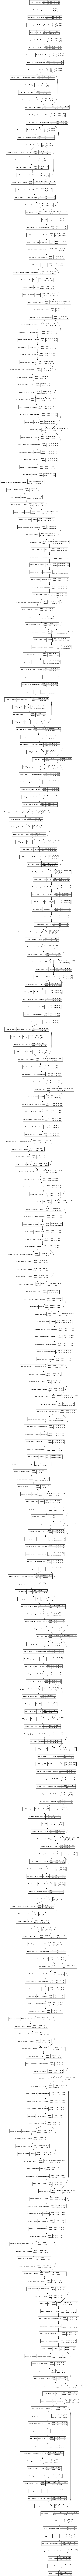

In [ ]:
keras.utils.plot_model(base_model,"Custom_Model.png", show_shapes=True)

### **Train model**

In [ ]:
epochs = 5
history = base_model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/5
2084/2084 [==============================] - 405s 186ms/step - loss: 0.8291 - accuracy: 0.9250 - val_loss: 0.7044 - val_accuracy: 0.9699
Epoch 2/5
2084/2084 [==============================] - 382s 183ms/step - loss: 0.6376 - accuracy: 0.9717 - val_loss: 0.6000 - val_accuracy: 0.9890
Epoch 3/5
2084/2084 [==============================] - 381s 183ms/step - loss: 0.5860 - accuracy: 0.9776 - val_loss: 0.6048 - val_accuracy: 0.9890
Epoch 4/5
2084/2084 [==============================] - 381s 183ms/step - loss: 0.5428 - accuracy: 0.9814 - val_loss: 0.7370 - val_accuracy: 0.9781
Epoch 5/5
2084/2084 [==============================] - 381s 183ms/step - loss: 0.5058 - accuracy: 0.9838 - val_loss: 0.7119 - val_accuracy: 0.9781


### **Visualize the results**

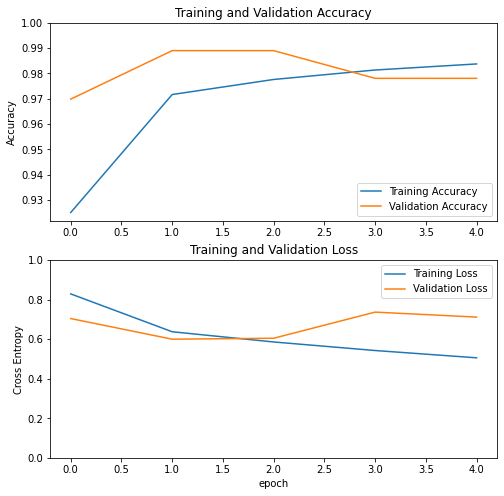

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = base_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

73/73 [==============================] - 4s 48ms/step - loss: 0.7031 - accuracy: 0.9836
Test accuracy : 0.983561635017395


**Akurasi yang didapat adalah 98% dengan 5x epoch benar terbukti jika model yang dibuat oleh creator sudah bagus.**

### **Model Inference**

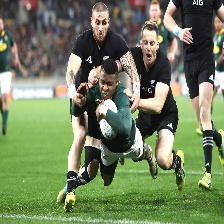

In [ ]:
test_image = r'/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 2/Milestone/2/test/rugby/3.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

img

In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = base_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to rugby with a 99.99 percent confidence.


**Untuk nilai prediksi model inference skornya cukup sempurna yaitu 99,99% confidence.**

## **STEP 9 : CONCLUSION**

### **EDA Analysis**

* **Dataset yang digunakan memiliki total 73 class yang berisikan 73 jenis cabang olahraga yang berbeda-beda tiap classnya.**
* **Dataset memiliki 3 Folder yang berisikan gambar untuk dilakukan Training, Validation dan Testing.**
* **Semua gambar memiliki format JPG.**
* **Terdapat 10.416 total gambar untuk data training pada folder train_folder.**
* **Terdapat 365 total gambar untuk data validasi pada folder val_folder.**
* **Terdapat 365 total gambar untuk data test pada folder test_folder.**
* **Semua gambar memiliki ukuran 224 x 224 height & width.**

### **Model Analysis**